In [3]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [4]:
# Check Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [6]:
# Define Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [10]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [11]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [12]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [14]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backprpagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.4093
Epoch [1/5], Step [200/600], Loss: 0.2178
Epoch [1/5], Step [300/600], Loss: 0.1691
Epoch [1/5], Step [400/600], Loss: 0.2085
Epoch [1/5], Step [500/600], Loss: 0.1059
Epoch [1/5], Step [600/600], Loss: 0.1925
Epoch [2/5], Step [100/600], Loss: 0.1111
Epoch [2/5], Step [200/600], Loss: 0.0871
Epoch [2/5], Step [300/600], Loss: 0.1358
Epoch [2/5], Step [400/600], Loss: 0.1640
Epoch [2/5], Step [500/600], Loss: 0.0673
Epoch [2/5], Step [600/600], Loss: 0.1780
Epoch [3/5], Step [100/600], Loss: 0.1580
Epoch [3/5], Step [200/600], Loss: 0.0454
Epoch [3/5], Step [300/600], Loss: 0.1322
Epoch [3/5], Step [400/600], Loss: 0.0213
Epoch [3/5], Step [500/600], Loss: 0.0527
Epoch [3/5], Step [600/600], Loss: 0.0941
Epoch [4/5], Step [100/600], Loss: 0.0873
Epoch [4/5], Step [200/600], Loss: 0.0172
Epoch [4/5], Step [300/600], Loss: 0.1439
Epoch [4/5], Step [400/600], Loss: 0.0191
Epoch [4/5], Step [500/600], Loss: 0.0170
Epoch [4/5], Step [600/600], Loss:

In [16]:
# Test the model
# In the test phase, don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.84 %


In [17]:
# Let's take a look on some examples
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([100, 1, 28, 28])

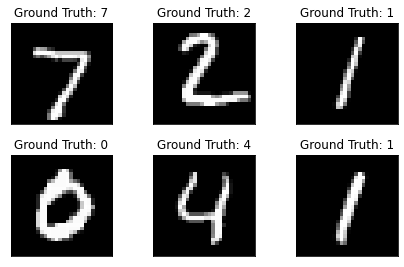

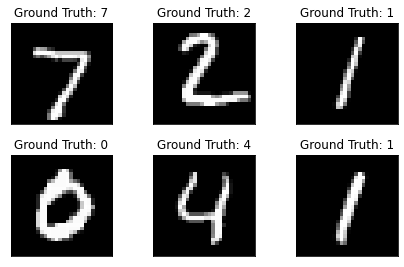

In [18]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [19]:
with torch.no_grad():
    images = example_data.reshape(-1, 28*28).to(device)
    output = model(images)

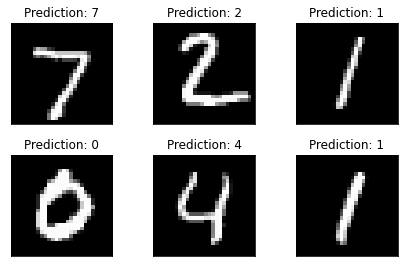

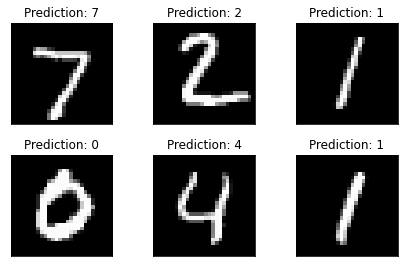

In [20]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
fig

In [ ]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')